In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [4]:
df = pd.read_csv("../Python/Output/sinVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,sin,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,0.1,-3.141593,-1.224647e-16,0.999308,-3.684348,3.478687,0.099433,0.099501,9.580032e-04,...,0.227910,0.175816,0.138249,0.102685,0.063615,0.052595,0.028050,0.019034,0.004508,0.006011
1,Uniform,0.1,-3.141593,-1.224647e-16,1.002099,-1.732039,1.732039,0.099710,0.099501,-2.841887e-18,...,0.288971,0.289471,0.290471,0.192481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gaussian,0.1,-2.945243,-1.950903e-01,0.999175,-3.544820,3.601904,0.097519,0.097599,1.911124e-03,...,0.232919,0.167301,0.141254,0.102184,0.067622,0.053596,0.033060,0.017532,0.010018,0.004508
3,Uniform,0.1,-2.945243,-1.950903e-01,1.002040,-1.701959,1.761776,0.097798,0.097599,9.741840e-04,...,0.282472,0.282472,0.281972,0.228477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gaussian,0.1,-2.748894,-3.826834e-01,0.999022,-3.393071,3.734415,0.091877,0.091967,2.790802e-03,...,0.230052,0.165397,0.142342,0.102747,0.069667,0.053629,0.036588,0.021051,0.011026,0.004010


In [5]:
sorted(df['Noise'].unique())

[0.0,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2,
 0.5]

In [6]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [7]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

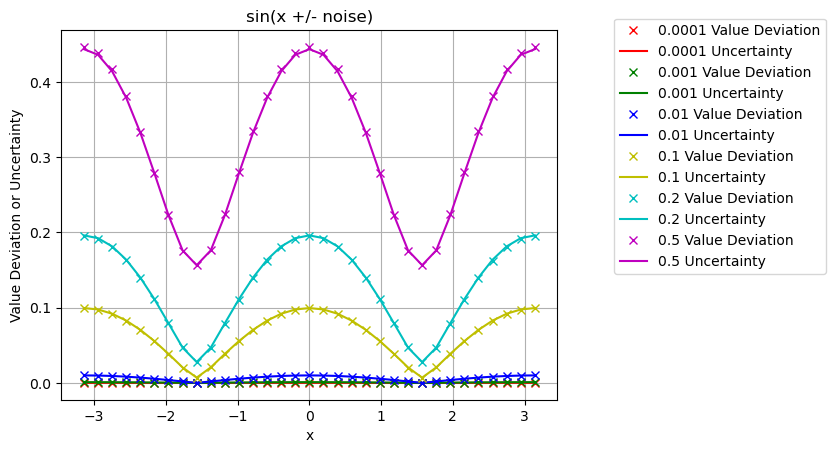

In [8]:
PlotValues()

In [9]:
def PlotErrorDev( noiseType='Gaussian', sNoise=(0.5, 1e-1, 1e-2, 1e-3, 1e-4),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise:.0e} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise:.0e} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

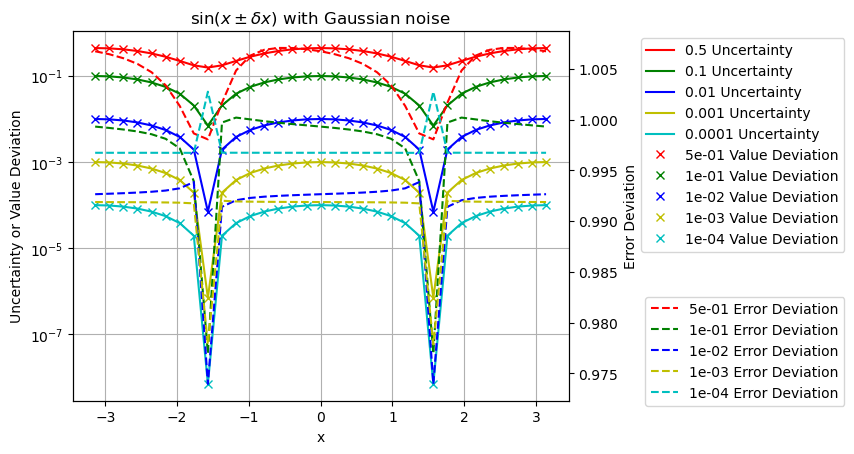

In [10]:
PlotErrorDev()

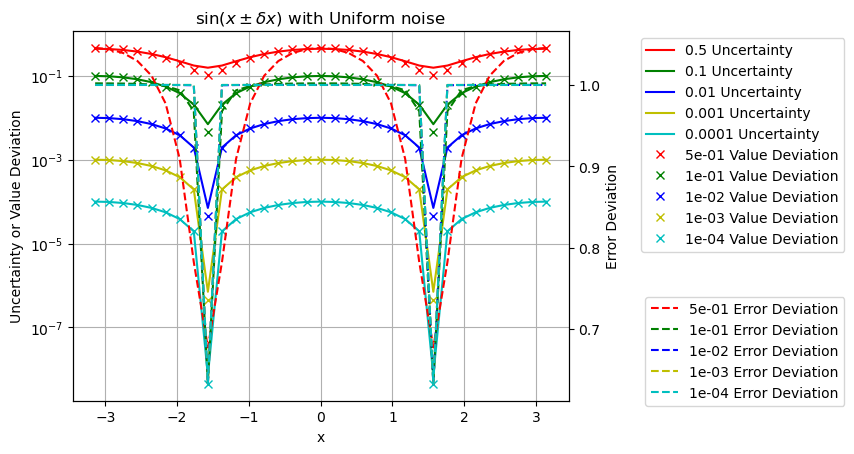

In [11]:
PlotErrorDev('Uniform')

# Mean vs Bias

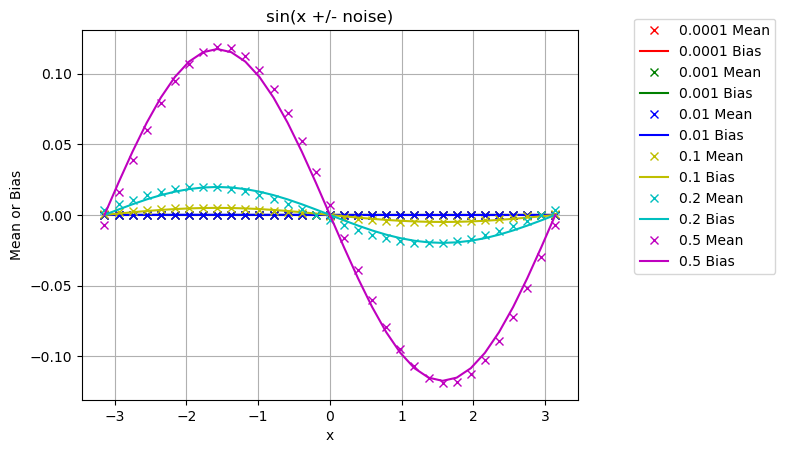

In [12]:
PlotValues(sValue=['Mean', 'Bias'])

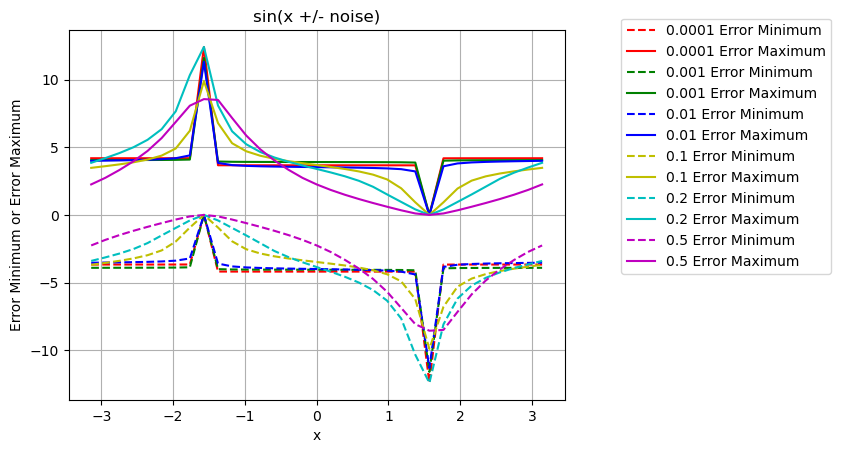

In [13]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# vs Noise vs X

In [14]:
def PlotSurface(value, noiseType):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['Noise']!=0)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x:.3}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

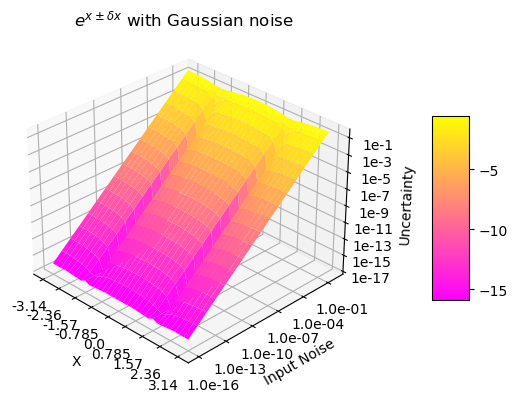

In [15]:
PlotSurface('Uncertainty', 'Gaussian')

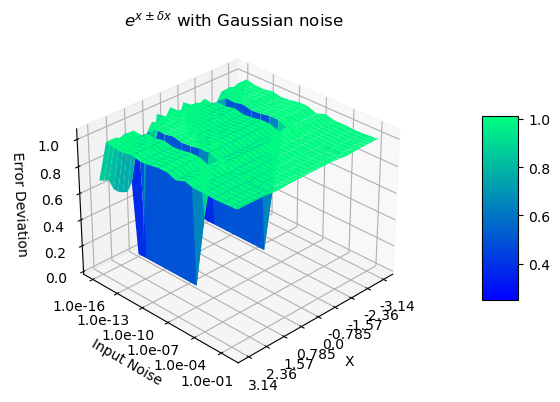

In [16]:
PlotSurface('Error Deviation', 'Gaussian')

# Histogram

In [17]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.004508,0.010519,0.019034,0.029052,0.048587,0.056101,0.096674,0.137247,0.187838,0.198858,...,0.227910,0.175816,0.138249,0.102685,0.063615,0.052595,0.028050,0.019034,0.004508,0.006011
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192481,0.290471,0.289471,0.288971,...,0.288971,0.289471,0.290471,0.192481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.004508,0.007013,0.019535,0.028551,0.042577,0.056602,0.093669,0.140252,0.181827,0.204368,...,0.232919,0.167301,0.141254,0.102184,0.067622,0.053596,0.033060,0.017532,0.010018,0.004508
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153985,0.299470,0.297970,0.295470,...,0.282472,0.282472,0.281972,0.228477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002506,0.005513,0.015537,0.028569,0.036087,0.057638,0.092221,0.133320,0.185445,0.208500,...,0.230052,0.165397,0.142342,0.102747,0.069667,0.053629,0.036588,0.021051,0.011026,0.004010


In [50]:
def PlotHisto( noiseType='Gaussian', sNoise=(1e-6, 1e-16), sX=(0, math.pi/4, math.pi/2), 
               style=['gx','c-', 'b--', 'g-', 'c--', 'b-']):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    ax = dfPlot[sHisto].T.plot(style=style, grid=True, xlabel='Normalized Error', ylabel='Normalized Count',
                              title=r'Histogram for Normalized Error of $\sin(x + \delta x)$')
    ax.legend(bbox_to_anchor=(1, 1))    


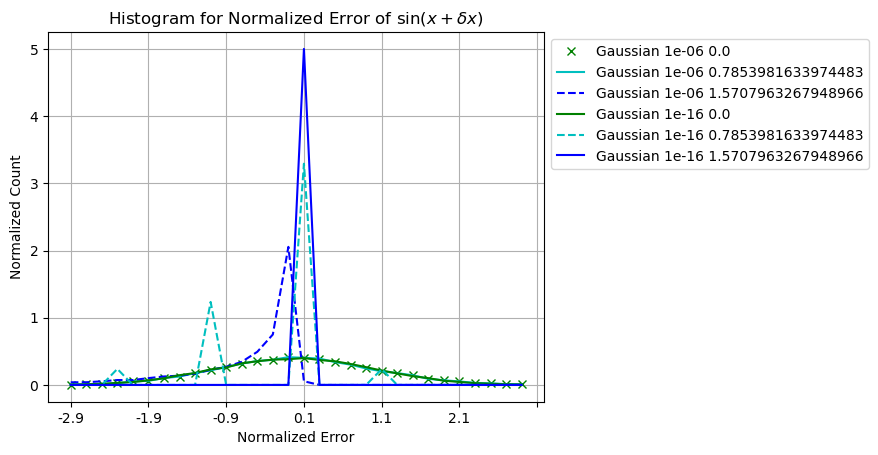

In [51]:
PlotHisto()

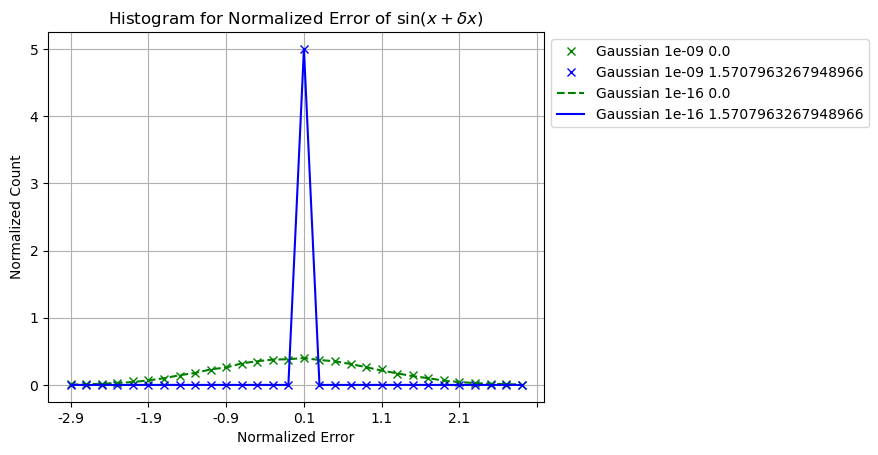

In [52]:
PlotHisto(sNoise=(1e-9, 1e-16), sX=(0, math.pi/2), style=['gx','bx', 'g--', 'b-'])

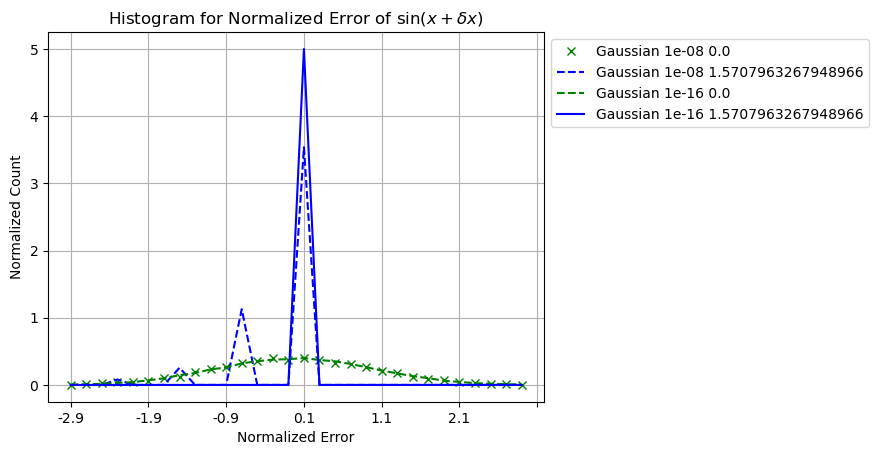

In [53]:
PlotHisto(sNoise=(1e-8, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

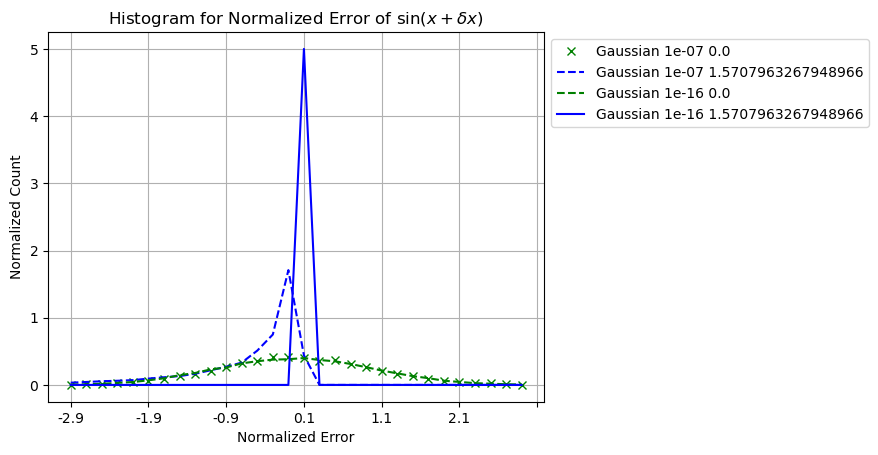

In [54]:
PlotHisto(sNoise=(1e-7, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

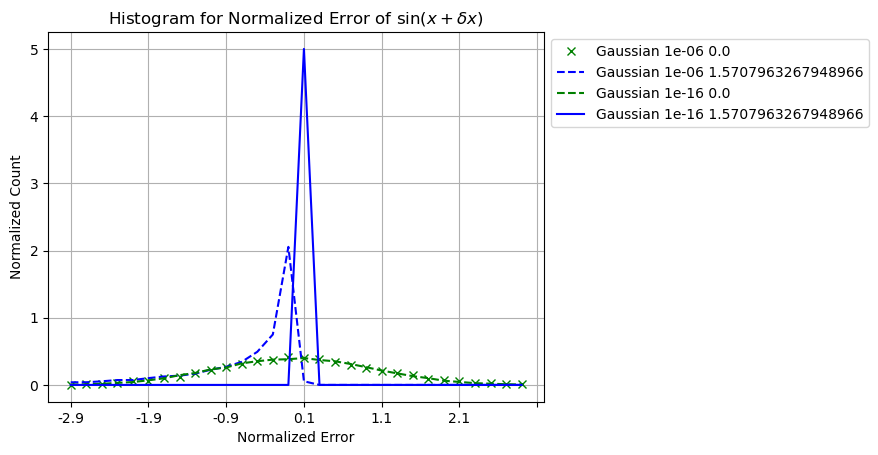

In [55]:
PlotHisto(sNoise=(1e-6, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

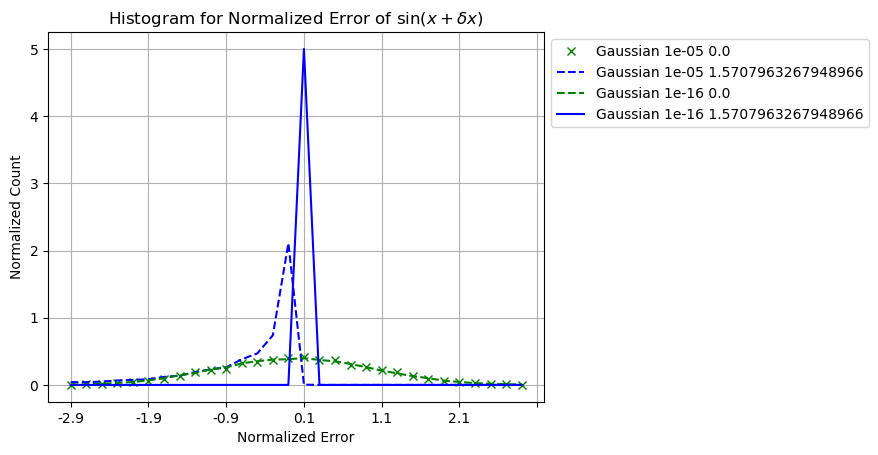

In [56]:
PlotHisto(sNoise=(1e-5, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

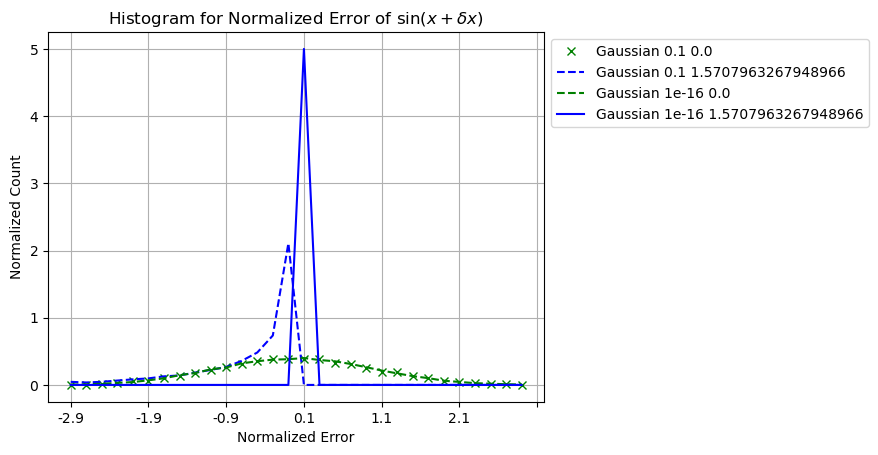

In [57]:
PlotHisto(sNoise=(1e-1, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

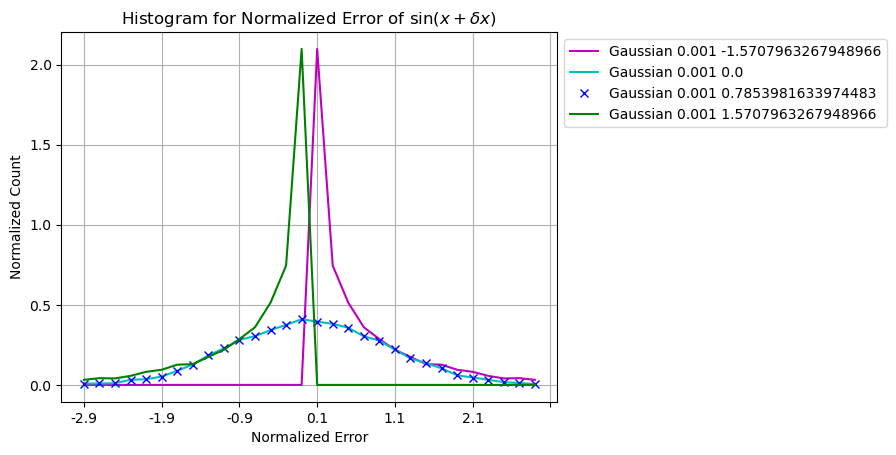

In [63]:
PlotHisto(sNoise=(1e-3,), sX=(0, -math.pi/2, math.pi/2, math.pi/4), style=['m-', 'c-', 'bx', 'g-'])